## Data Analysis of Laptop sales.

In [1]:
#import library and read the file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
laptop = pd.read_csv('laptops.csv', encoding="latin-1")
laptop.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


## Data Cleaning 

In this part, we will clean the data where it is necessary. Cleaning of data involves Changing data type, remove or replace
unecssary sign and symbol. 

We will also deal with any NaN in Dataset. 

### Task 1: Replace space in column name with "_" and bring all of it to lowercase.

In [2]:
laptop.columns = laptop.columns.str.replace(r"[()]","").str.strip().str.lower()
laptop.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price euros'],
      dtype='object')

### Task2 : Get information about Dataset

In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   manufacturer              1303 non-null   object
 1   model name                1303 non-null   object
 2   category                  1303 non-null   object
 3   screen size               1303 non-null   object
 4   screen                    1303 non-null   object
 5   cpu                       1303 non-null   object
 6   ram                       1303 non-null   object
 7   storage                   1303 non-null   object
 8   gpu                       1303 non-null   object
 9   operating system          1303 non-null   object
 10  operating system version  1133 non-null   object
 11  weight                    1303 non-null   object
 12  price euros               1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [4]:
laptop.shape

(1303, 13)

In [5]:
laptop.isnull().sum()

manufacturer                  0
model name                    0
category                      0
screen size                   0
screen                        0
cpu                           0
ram                           0
storage                       0
gpu                           0
operating system              0
operating system version    170
weight                        0
price euros                   0
dtype: int64

### Task3: Remove and Change of Data type.

The following columns represent the numerical values: 
   * screen size
   * price euros
 
In this task, we will remove all non-numerical value and change it datatype to int/float. 

In [6]:
# screen size
laptop['screen size'] = laptop['screen size'].apply(lambda x : x.replace('"',"")).astype(float)

In [7]:
# price euros
laptop['price euros'] = laptop['price euros'].apply(lambda x : x.replace(",", ".")).astype(float)

### Task4: Split of Storage columns into disk size and disk kind

In [8]:
def Storage(disk):
    result = disk.split(" ")
    size = result[0]
    kind = result[1]
    
    return size, kind
laptop['disk size'] = laptop.storage.apply(lambda x : Storage(x)[0])
laptop['disk kind'] = laptop.storage.apply(lambda x : Storage(x)[1])
 

### Task5: Get screen resolution for the given Screen column.

In [9]:
laptop['screen resolution'] = laptop['screen'].apply(lambda x : x.split()[-1])

## Data Analysis

### Task1: Top laptop manufacturer and higest number Model.

Text(0.5, 1.0, 'Sales of Laptop W.R.T Brand')

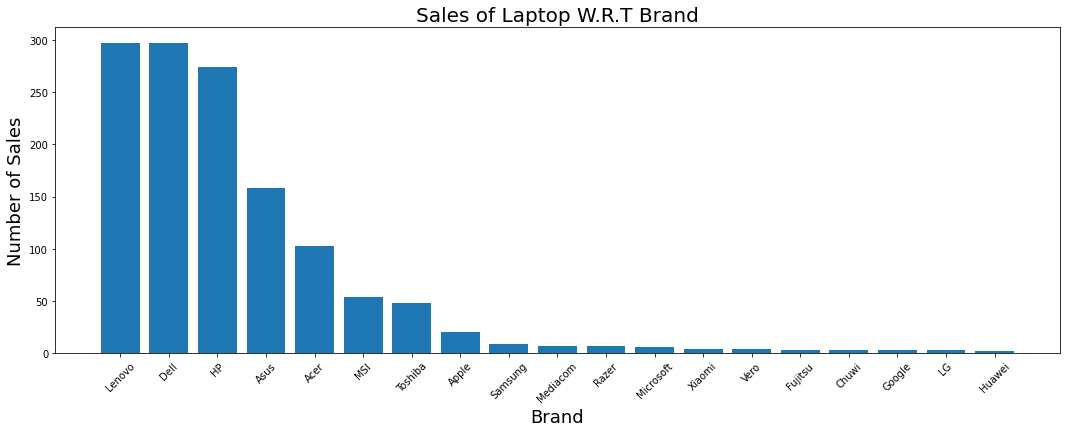

In [10]:
brand = laptop.manufacturer.value_counts()
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(brand.index, brand.values)
plt.xticks(rotation=45)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Number of Sales', fontsize=18)
plt.title('Sales of Laptop W.R.T Brand', fontsize=20)

Text(0.5, 1.0, 'Number of Unique Model of each Manufacturer')

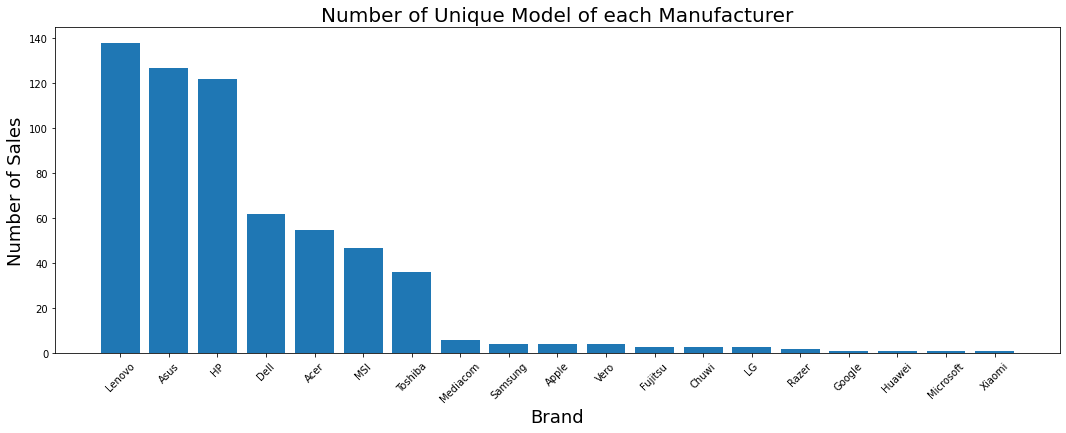

In [11]:
model = laptop.groupby('manufacturer')['model name'].nunique().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18,6))
ax.bar(model.index, model.values)
plt.xticks(rotation=45)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Number of Sales', fontsize=18)
plt.title('Number of Unique Model of each Manufacturer', fontsize=20)


**Top 5 laptop Manufacturer:**
 * Lenovo, Dell, HP, Asus, Acer
 
**Top 5 laptop Manufacturer with unique model:**
 * Lenovo, Asus, HP, Dell, Acer 
 
 
From the above observation we can see that, Lenovo is big player of Laptop Manufacture with highest number of Model.


### Task2: Screen size

Text(0.5, 1.0, 'Range of Screen size')

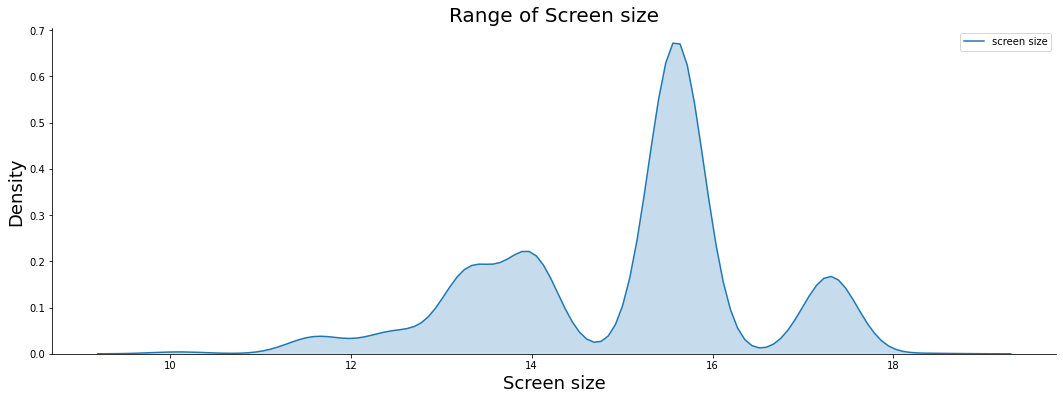

In [12]:
plt.figure(figsize=(18,6))
sns.kdeplot(laptop['screen size'], shade= True)
sns.despine()
plt.xlabel('Screen size', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title('Range of Screen size', fontsize=20)

Text(0.5, 1.0, 'Range of Screen size of Different Manufacture')

<Figure size 1296x432 with 0 Axes>

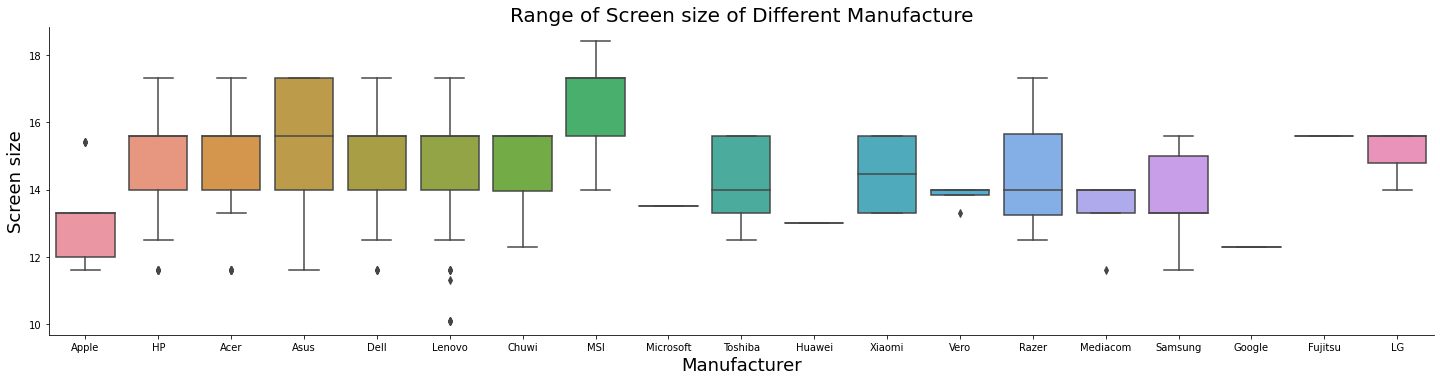

In [13]:
plt.figure(figsize=(18,6))
sns.catplot(x='manufacturer', y='screen size', kind='box', data=laptop, aspect=4)
plt.xlabel('Manufacturer', fontsize=18)
plt.ylabel('Screen size', fontsize=18)
plt.title('Range of Screen size of Different Manufacture', fontsize=20)

Text(0.5, 1.0, 'Screen resolution vs Number of devices')

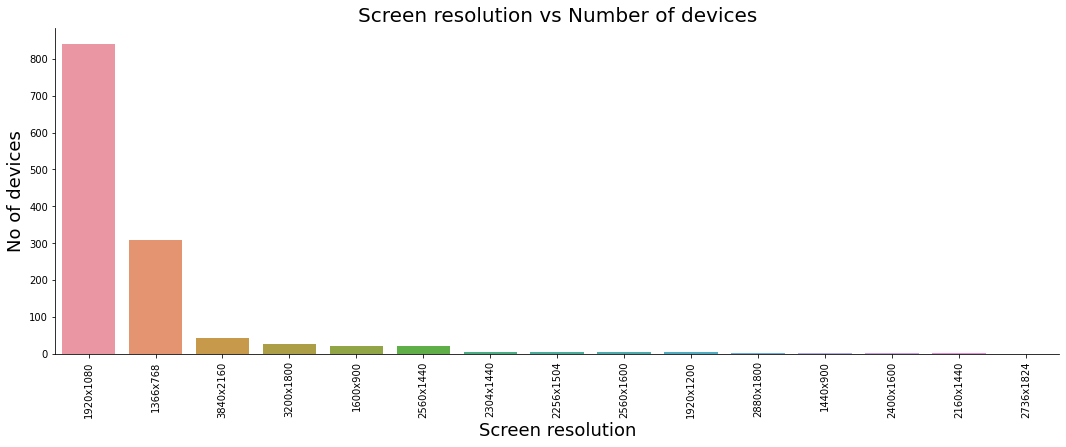

In [14]:
screen_res = laptop['screen resolution'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=screen_res.index, y=screen_res)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Screen resolution', fontsize=18)
plt.ylabel('No of devices', fontsize=18)
plt.title('Screen resolution vs Number of devices', fontsize=20)

From the above observation, we can say that, most of the device have 12-17" screen among them ASUS has different range of screen size. 

If you see the screen resolution, 1920x1080 is most common followed by 1366x768 and 3840x2160.  

### Task3: CPU

In [15]:
cpu = laptop.cpu.str.split().str[0].value_counts()
cpu

Intel      1240
AMD          62
Samsung       1
Name: cpu, dtype: int64

Text(0.5, 1.0, 'Intel CPU Type')

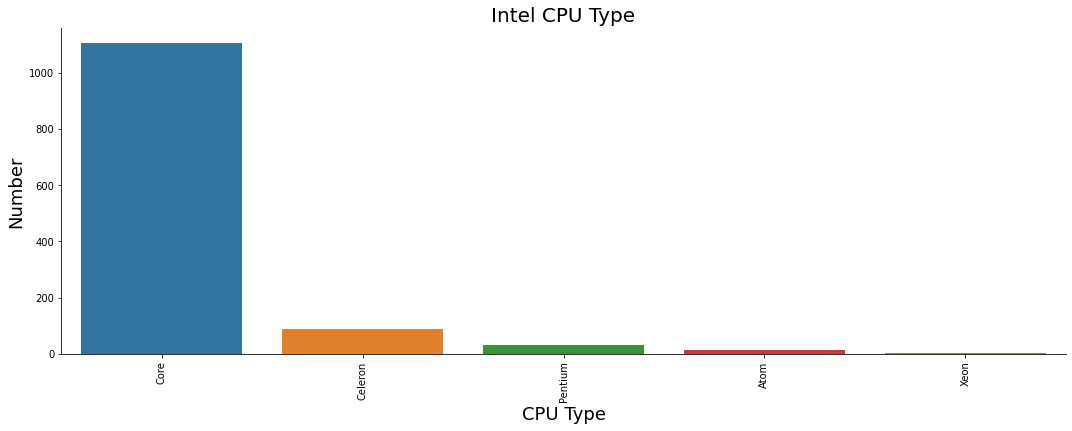

In [16]:
types = laptop[laptop['cpu'].str.contains('Intel')]['cpu'].str.split().str[1].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=types.index, y=types)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('CPU Type', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.title('Intel CPU Type', fontsize=20)

Text(0.5, 1.0, 'Intel CPU by Generation')

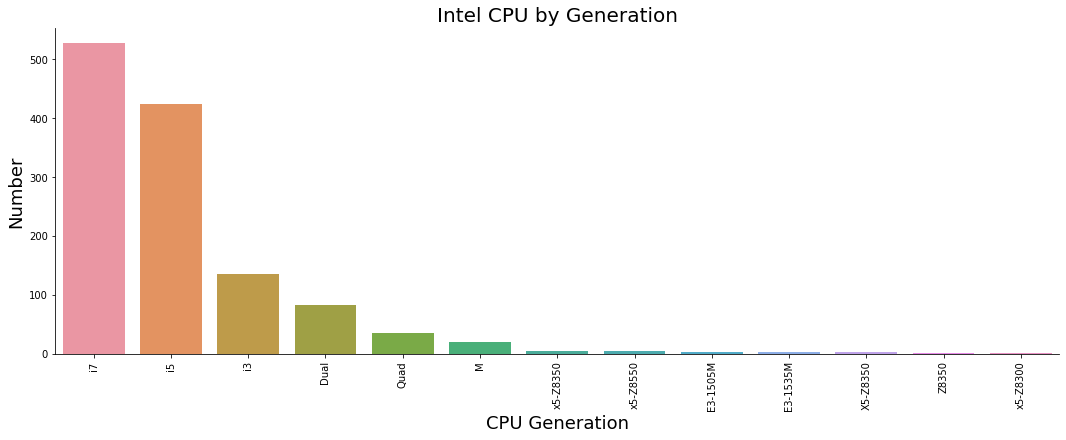

In [17]:
processor = laptop[laptop['cpu'].str.contains('Intel')]['cpu'].str.split().str[2].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=processor.index, y=processor)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('CPU Generation', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.title('Intel CPU by Generation', fontsize=20)

In [18]:
laptop.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price euros,disk size,disk kind,screen resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,1339.69,128GB,SSD,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,898.94,128GB,Flash,1440x900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,575.00,256GB,SSD,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,2537.45,512GB,SSD,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,1803.60,256GB,SSD,2560x1600


### Task4: Highest sell of Laptop.

In [33]:
laptop.groupby('manufacturer')['price euros'].sum().sort_values(ascending=False)

manufacturer
Dell         352262.49
Lenovo       322656.18
HP           292570.31
Asus         174458.76
MSI           93361.04
Acer          64557.91
Toshiba       60855.00
Apple         32848.17
Razer         23423.00
Samsung       12721.00
Microsoft      9673.85
LG             6297.00
Google         5033.00
Xiaomi         4533.85
Huawei         2848.00
Fujitsu        2187.00
Mediacom       2065.00
Chuwi           942.89
Vero            869.70
Name: price euros, dtype: float64

In [41]:
laptop_price = laptop[laptop['manufacturer'] == 'Dell'][['model name','price euros']]
laptop_price.groupby('model name')['price euros'].sum().sort_values(ascending=False)

model name
XPS 13           49847.00
Alienware 17     43716.58
XPS 15           19010.10
Inspiron 5570    16231.95
Inspiron 3567    16197.94
                   ...   
Insprion 5767      659.00
Inspiron 3179      603.00
Latitude 3570      481.98
Inspiron 3168      479.00
Chromebook 11      295.00
Name: price euros, Length: 62, dtype: float64